## Goal:
Trim two lines that cross eachother to their intersection point if the tolerance condition is satisfied.   
Tolerance condition: the part after or before intersection should not be larger than ($\texttt{upLim}$) and not smaller than ($\texttt{lowLim}$).

## Steps:

1. #### Create two lines.
2. #### Check to see if they have any kind of intersection. 
3. #### Trim the parts after or before intersection if the tolerence condition is satisfied.
4. #### Create a clean function.

First: Define a function to plot a $\texttt{Line}$ using $\texttt{𝚜𝚑𝚊𝚙𝚎𝚕𝚢}$ so that visualization is possible.

In [1]:
import shapely 
# function: plots one line (not a lineList) with first and last points with different colors
def plot_line(ax, line):
    #line = [(x, y),...]
    x, y = LineString(line).xy
    # plot lines between points
    ax.plot(x, y, color="#C885CD", alpha=0.7, linewidth=1, solid_capstyle='round', zorder=1)
    # Plot first and last points with different colors
    ax.plot(x[0], y[0], 'o', color='#80F222', zorder=2)
    ax.plot(x[-1], y[-1], 'o', color='#F22222', zorder=2)
    
# function: handle axes limits and title of a plot of a (lineList 
def handle_axesLimTitle_for_lineList(ax, lineList, title):
    #lineList = [line1, ...]
    allXList = []
    allYList = []
    for line in lineList:
        for point in line:
            allXList.append(point[0])
            allYList.append(point[1])
    XLim = [min(allXList), max(allXList)]
    YLim = [min(allYList), max(allYList)]
    XEmptySpace = int((XLim[1]-XLim[0])/5.0)
    YEmptySpace = int((YLim[1]-YLim[0])/5.0)
    if XEmptySpace == 0:
        XEmptySpace = 1
    if YEmptySpace == 0:
        YEmptySpace = 1
    Xrange = [int(XLim[0]) - XEmptySpace, int(XLim[1]) + XEmptySpace]
    Yrange = [int(YLim[0]) - YEmptySpace, int(YLim[1]) + YEmptySpace]
    ax.set_xlim(*Xrange)
    ax.set_ylim(*Yrange)
    # ax.set_yticks(list(range(*Yrange)) + [Yrange[-1]])
    # ax.set_aspect(1)
    ax.set_title(title) 

#### Create two lines:
* store the lines in a list

In [2]:
A = (-1, 0)
B = (5, 0)
C = (0, -1)
D = (0, 5)
line1 = [B, A]
line2 = [C, D]
lineList = [line1, line2]

* Plot the lines

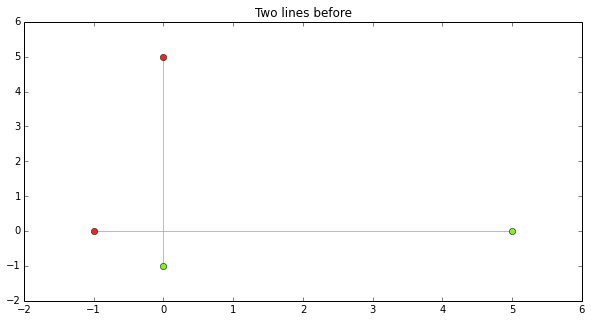

In [3]:
from shapely.geometry import LineString
from matplotlib import pyplot
%matplotlib inline

fig = pyplot.figure(1, figsize=(10,5), dpi=90)
ax = fig.add_subplot(111)
for line in lineList:
    plot_line(ax, line)
handle_axesLimTitle_for_lineList(ax, lineList, "Two lines before")
pyplot.show()   

#### Check to see if they have a one point kind of intersection:

In [4]:
import shapely
intsct = LineString(lineList[0]).intersection(LineString(lineList[1]))
print intsct

POINT (0 0)


#### Trim the parts after or before intersection if the tolerence condition is satisfied:

In [113]:
import shapely
from shapely.geometry import LineString
from shapely.geometry import Point

upLimTol, lowLimTol = 3, 0.5
for i in range(0,len(lineList)):
    line = lineList[i]
    if Point(line[0]).distance(intsct) < upLimTol and Point(line[0]).distance(intsct) > lowLimTol:
        lineList[i][0] = (intsct.x, intsct.y)
    if Point(line[-1]).distance(intsct) < upLimTol and Point(line[1]).distance(intsct) > lowLimTol:
        lineList[i][1] = (intsct.x, intsct.y)    

* Plot the result 

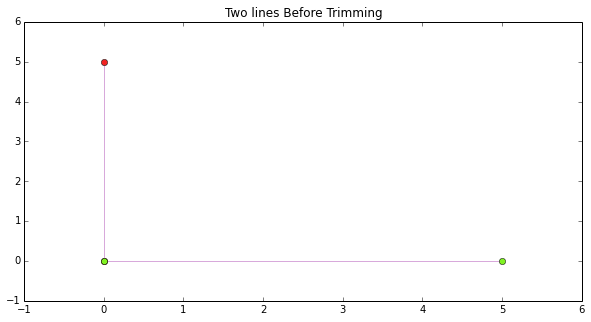

In [86]:
from shapely.geometry import LineString
from matplotlib import pyplot
%matplotlib inline

fig = pyplot.figure(1, figsize=(10,5), dpi=90)
ax = fig.add_subplot(111)

for line in lineList:
    plot_line(ax, line)

handle_axesLimTitle_for_lineList(ax, lineList, "Two lines after")
pyplot.show() 

#### Create a clean function:
* input: a lineList and two tolerances upLim and lowLim.
* output: a lineList with lines after they are trimmed (if necessary).

In [97]:
import shapely
from shapely.geometry import LineString
from shapely.geometry import Point
def two_line_trimmer(lineList, upLim, lowLim):
    if LineString(lineList[0]).intersects(LineString(lineList[0])) == False:
        return lineList
    else:
        intsct = LineString(lineList[0]).intersection(LineString(lineList[0]))
        for i in range(0,len(lineList)):
            line = lineList[i]
            if Point(line[0]).distance(intsct) < upLimTol and Point(line[0]).distance(intsct) > lowLimTol:
                lineList[i][0] = (intsct.x, intsct.y)
            if Point(line[-1]).distance(intsct) < upLimTol and Point(line[1]).distance(intsct) > lowLimTol:
                lineList[i][1] = (intsct.x, intsct.y)
        return lineList    

## Code:
### a) Functions:

In [114]:
import shapely
from shapely.geometry import LineString
from shapely.geometry import Point
from matplotlib import pyplot
%matplotlib inline

# function: plots one line (not a lineList) with first and last points with different colors
def plot_line(ax, line):
    #line = [(x, y),...]
    x, y = LineString(line).xy
    # plot lines between points
    ax.plot(x, y, color="#C885CD", alpha=0.7, linewidth=1, solid_capstyle='round', zorder=1)
    # Plot first and last points with different colors
    ax.plot(x[0], y[0], 'o', color='#80F222', zorder=2)
    ax.plot(x[-1], y[-1], 'o', color='#F22222', zorder=2)
    
# function: handle axes limits and title of a plot of a (lineList 
def handle_axesLimTitle_for_lineList(ax, lineList, title):
    #lineList = [line1, ...]
    allXList = []
    allYList = []
    for line in lineList:
        for point in line:
            allXList.append(point[0])
            allYList.append(point[1])
    XLim = [min(allXList), max(allXList)]
    YLim = [min(allYList), max(allYList)]
    XEmptySpace = int((XLim[1]-XLim[0])/5.0)
    YEmptySpace = int((YLim[1]-YLim[0])/5.0)
    if XEmptySpace == 0:
        XEmptySpace = 1
    if YEmptySpace == 0:
        YEmptySpace = 1
    Xrange = [int(XLim[0]) - XEmptySpace, int(XLim[1]) + XEmptySpace]
    Yrange = [int(YLim[0]) - YEmptySpace, int(YLim[1]) + YEmptySpace]
    ax.set_xlim(*Xrange)
    ax.set_ylim(*Yrange)
    # ax.set_yticks(list(range(*Yrange)) + [Yrange[-1]])
    # ax.set_aspect(1)
    ax.set_title(title) 
# Trimmer Function
def two_line_trimmer(lineList, upLim, lowLim):
    if LineString(lineList[0]).intersects(LineString(lineList[0])) == False:
        return lineList
    else:
        intsct = LineString(lineList[0]).intersection(LineString(lineList[1]))
        for i in range(0,len(lineList)):
            line = lineList[i]
            if Point(line[0]).distance(intsct) < upLimTol and Point(line[0]).distance(intsct) > lowLimTol:
                lineList[i][0] = (intsct.x, intsct.y)
            if Point(line[-1]).distance(intsct) < upLimTol and Point(line[1]).distance(intsct) > lowLimTol:
                lineList[i][1] = (intsct.x, intsct.y)
        return lineList    

### b) Main code:

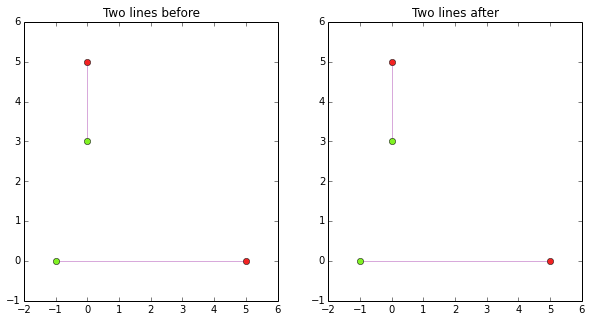

In [116]:
# Create two lines
A = (-1, 0)
B = (5, 0)
C = (0, 3)
D = (0, 5)
line1 = [A, B]
line2 = [C, D]
lineList = [line1, line2]

# Plot things before Trimming
fig = pyplot.figure(1, figsize=(10,5), dpi=90)
ax = fig.add_subplot(121)
for line in lineList:
    plot_line(ax, line)
handle_axesLimTitle_for_lineList(ax, lineList, "Two lines before")

# Trim them if necessary
upLim, lowLim = 3, 0.01 
two_line_trimmer(lineList, upLim, lowLim)

# Plot Things after Trimming
ax = fig.add_subplot(122)
for line in lineList:
    plot_line(ax, line)
handle_axesLimTitle_for_lineList(ax, lineList, "Two lines after")
pyplot.show() 